# 17. Modelos de variable dependiente limitada y correcciones a la  selección muestral

### Modelo Tobit
Paper: Estimation of Relationships for Limited Dependent Variables

El ejemplo que pone Tobin es de los gastos y la curva de Engel, donde hay algunos bienes de lujos que no se consumen hasta tener cierto nivel de ingreso lo que implica que hay una solución de "esquina" como dice Wooldridge. 

Si no hubiera tal concentración de observaciones en el límite entonces se establece regresión múltiple, pero como la hay los supuestos necesarios para la regresión múltiples no se cumplen. Por lo tanto, el modelo se trata de un análisis híbrido de probit.

**Modelo**

Sea $W$ una variable dependiente limitada con un límite inferior $L$. Donde $Y$ es una combinación lineal de variables independientes para la cual $W$ es por hipótesis relacionada:

$$Y = \beta X$$

Las viviendas  difieren entre ellas en su comportamiento según $W$ por distintas razones para las cuales las variables independientes y el límite inferior $L$, no tiene en cuenta. Esas diferencias las representamos con una variable aleatoria $\epsilon$ con media cero y desviación $\sigma$. De esta forma:

$$\left\{\begin{array}{ll}W = L & & Y-\epsilon< L\\
W = Y - \epsilon & & Y-\epsilon\geq  L\end{array}\right.$$

Sea $P(x)$ el valor de la función de distribución de probabilidad acumulada de una normal en $x$, y $Q(x) = 1 -P(x)$, y $Z(x)$ el valor de función de densidad de probabilidad. De esta forma nos queda:

$$Pr(W = L|Y,L) = Pr(\epsilon> Y- L) = Q\left(\frac{Y-L}{\sigma}\right)$$

$$Pr(W>x\geq L|Y) = Pr(Y - \epsilon> L) = Q\left(\frac{Y-x}{\sigma}\right)$$

Por lo tanto, la función de distribución acumulada de $W$ para $Y$ y $L$ dados es:


$$\left\{\begin{array}{ll}F(x;Y,L) = 0 & & x< L\\
F(L;Y,L) =   Q\left(\frac{Y-L}{\sigma}\right)& & \\
F(x;Y,L) =   Q\left(\frac{Y-x}{\sigma}\right)& & x>L\end{array}\right.$$

La correspondiente función de densidad es:

$\frac{\partial F(x;Y,L)}{\partial x} =   \frac{\partial Q\left(\frac{Y-x}{\sigma}\right)}{\partial x}$

$$f(x;Y,L) = \frac{1}{\sigma}Z\left(\frac{Y-x}{\sigma}\right)$$

El valor esperado de $W$ por lo tanto nos queda:

$$E(W;Y,L) = LQ\left(\frac{Y-L}{\sigma}\right) + \int_L^\infty \frac{x}{\sigma}Z\left(\frac{Y-x}{\sigma}\right)~dx$$

Que es lo mismo que:

In [227]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 3

V = np.random.normal(3, 1, 10000).reshape(-1, 1)
Z = np.random.normal(10, 1, len(V)).reshape(-1, 1)
epsilon = np.random.normal(0, sigma, len(V)).reshape(-1, 1)

X = np.hstack((np.ones((len(V), 1)), V, Z))
beta = np.array([[-7],[2],[0]])

Y = X@beta


def fun(Y, L):
    W = np.maximum(L, Y - epsilon)
    return W

W = fun(Y, 0)

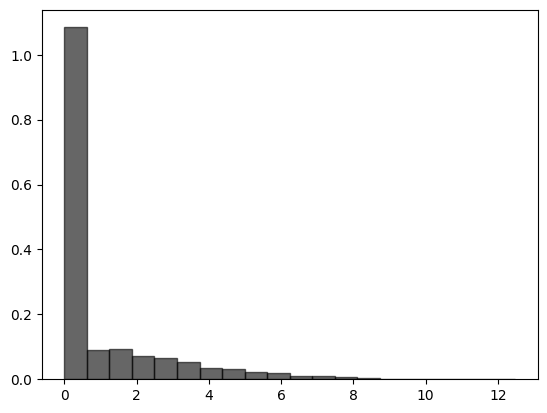

In [228]:
plt.hist(W, bins=20, density=True, alpha=0.6, color='black', edgecolor='black');


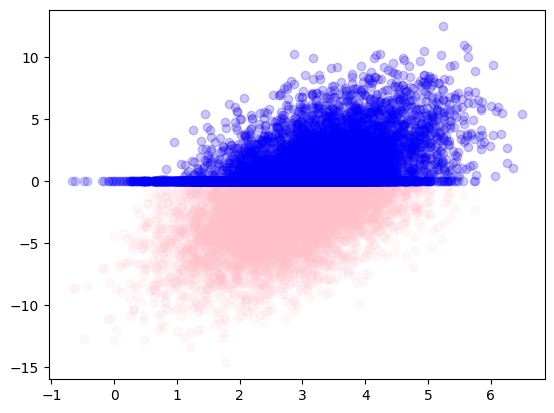

In [229]:
plt.scatter(V,Y - epsilon,alpha = 0.1, c='pink')
plt.scatter(V,W,c='blue',alpha=0.2)

In [230]:
Yfilt = np.where((Y >= 0.5) & (Y < 0.6))[0]

Wfilt = [W[i] for i in Yfilt]

Wfilt[:10]

[array([0.44711515]),
 array([3.15990462]),
 array([2.35011605]),
 array([3.15983703]),
 array([1.02038201]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([3.02633111])]

In [231]:
mean = np.mean(Wfilt)

mean

1.6987380719550076

In [232]:
#Mientras que el valor esperado de 18, nos queda:
from scipy.integrate import quad
from scipy.stats import norm

Ybar = .5
L = 0

def inte(x, Y, sigma):
    return (x / sigma) * norm.pdf((Y - x) / sigma)

integral,_ = quad(lambda x: inte(x, Ybar, sigma), L, np.inf)
expected = L * norm.sf((Ybar-L)/sigma) + integral
expected

1.4634110646112715

Alternativamente, podemos escribir: 


$E(W;Y,L) = LQ\left(\frac{Y-L}{\sigma}\right) + \int^{(Y-L)/\sigma}_{-\infty} \left(Y - \sigma x\right)Z\left(x\right)~dx$

$$E(W;Y,L) = LQ\left(\frac{Y-L}{\sigma}\right) + Y \int^{(Y-L)/\sigma}_{-\infty} Z(x)~dx + \sigma \int^{(Y-L)/\sigma}_{-\infty} - xZ\left(x\right)~dx$$

Debido al supuesto de normal, podemos escribir:

$$Z(x) = \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}$$

Derivando con respecto de x

$Z'(x) = -\frac{2x}{2}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}$

$$-xZ(x) = Z'(x)$$

Por lo tanto, podemos escribir:

$$E(W;Y,L) = LQ\left(\frac{Y-L}{\sigma}\right) + Y \int^{(Y-L)/\sigma}_{-\infty} Z(x)~dx + \sigma \int^{(Y-L)/\sigma}_{-\infty} Z'(x)~dx$$

Resolviendo las integrales:

$$E(W;Y,L) = LQ\left(\frac{Y-L}{\sigma}\right) + Y P\left(\frac{Y-L}{\sigma}\right) + \sigma Z\left(\frac{Y-L}{\sigma}\right) $$


In [233]:
expected2 = L * norm.sf((Ybar-L)/sigma) + Ybar*norm.cdf((Ybar-L)/sigma) + sigma*norm.pdf((Ybar-L)/sigma)
expected2 - expected

2.220446049250313e-16

### Solución de Máxima Verosimilitud

Una muestra que tiene $q$ observaciones, donde $W$ está en el límite $L$, mientras que también incluye $r$ observaciones para las cuales $W$ está por encima del límite. 

Por lo tanto, la probabilidad de que $W$ está por debajo del límite va a estar dada por la distribución acumulada, mientras que la probabilidad de observar un valor específico está dada por la función de densidad.

El producto de las probabilidad de cada observación en la muestra entonces nos va a decir la probabilidad de esa muestra:

$$\phi\left(a_0,a_1,\dots,a_m,a\right) = \prod_{i=1}^q F\left(L_i';Y_i',L_i'\right) \prod_{j=1}^r f\left(W_j;Y_j,L_j\right)$$ 

Donde $\frac{1}{a}$ es la estimación de $\sigma$. Para el primer término entonces es la probabilidad acumulada del error que se distribuye de forma normal. Mientras que para la segunda ya habíamos establecido que la función de densidad se podía escribir como $ \frac{1}{\sigma}Z\left(\frac{Y-x}{\sigma}\right)$, por lo tanto, podemos escribir:

$$\phi\left(\beta_0,\beta_1,\dots,\beta_m,\sigma\right) = \prod_{i=1}^q Q\left(\frac{Y_i' - L_i'}{\sigma}\right) \prod_{j=1}^r \frac{1}{\sigma}Z\left(\frac{Y_j - W_j}{\sigma}\right)$$ 

$$\phi\left(a_0,a_1,\dots,a_m,a\right) = \prod_{i=1}^q Q\left(\frac{Y_i' - L_i'}{1/a}\right) \prod_{j=1}^r \frac{1}{1/a}Z\left(\frac{Y_j - W_j}{1/a}\right)$$ 

Donde $I_i = aY_i = a_0 + a_1X_{1i}+ \dots$ y, por lo tanto, $a_j = \beta_j/\sigma$. Esto nos permite escribir:

$$\phi\left(a_0,a_1,\dots,a_m,a\right) = \prod_{i=1}^q Q\left(I_i' - aW_i'\right) \prod_{j=1}^r aZ\left(I_j - aW_j\right)$$ 

Tomando logaritmos para obtener la función log de verosimilitud:

$$\phi^* = \sum_{i=1}^q \ln Q\left(I_i' - aW_i'\right) + r \ln a + \sum_{i=1}^r \ln Z\left(I_j - aW_j\right)$$

Reemplazando con la función de densidad de distribución normal $\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}$:

$$\phi^* = \sum_{i=1}^q \ln Q\left(I_i' - aW_i'\right) + r \ln a - \frac{r}{2}\ln 2\pi - \sum_{i=1}^r\frac{\left(I_j - aW_j\right)^2}{2}$$

Maximizamos la función eligiendo nuestros "betas":

$$\max_{a_k,a} \phi^* $$

**CPO**

$\frac{\partial \phi^*}{\partial a_k} = \sum_{i=1}^q  \frac{-Z\left(I_i' - aW_i'\right)}{Q\left(I_i' - aW_i'\right)}X_{ki}' -  \sum_{i=1}^r\left(I_j - aW_j\right)X_{kj} = 0$

$\frac{\partial \phi^*}{\partial a} = \sum_{i=1}^q  \frac{Z\left(I_i' - aW_i'\right)}{Q\left(I_i' - aW_i'\right)}W_{i}' + \frac{r}{a} +  \sum_{i=1}^r\left(I_j - aW_j\right)W_{j} = 0$

Esto nos deja un sistema de ecuaciones de $m+2$ (sumando la ordenada al origen y sigma) no lineales que se resuelven por métodos numéricos.

Para hacer los test de hipótesis lo que se hace es evaluar la función restringida y no restringida, al igual que en el test f. Y se calcula el logatimo del cociente de la función de probabilidad restringida sobre no restringida. Esto se distribuye en forma de chi con $m$ grados de libertad. Que es lo mismo que hacer la diferencia entre las funciones logarítmicas de verosimilitud.


In [241]:
import numpy as np
from scipy.optimize import minimize
import statsmodels.api as sm
from scipy.stats import norm

def log_likelihood(parameters, W, X):
    parameters = parameters.reshape(-1, 1)
    beta = parameters[:-1]
    sigma = parameters[-1]
    Wmin = W.min()
    censed = np.where(W == Wmin, 1, 0)
    notcensed = 1 - censed
    Xb = X @ beta

    term1 = np.log(norm.cdf((W- Xb) / sigma))
    term2 = (np.log(norm.pdf((W - Xb) / sigma)) - np.log(sigma))
    return -(censed.T@term1 + notcensed.T@term2) #Como minimiza colocamos la opuesta

def optimize_likelihood(W, X):
    params_init = np.append(sm.OLS(W, X).fit().params , (sm.OLS(W, X).fit().ssr/(X.shape[0] - X.shape[1]))**0.5)
    return minimize(log_likelihood, params_init, args=(W, X), method='BFGS').x.reshape(-1, 1)

In [235]:
optimize_likelihood(W, X)

array([[-7.39929353],
       [ 1.93469322],
       [ 0.05840982],
       [ 3.02549173]])

### Interpretación de las Estimaciones

Antes para realizar las interpretaciones de los $\beta$ podíamos decir que:

$$E[W|X] = X\beta$$

Por lo tanto, si derivamos respecto de $x$ obtenemos que los betas indican el efecto marginal de $x$. Ahora, cuando tomamos expectativas, se puede realizar de forma condicional tal que:

$$E[W|X] = Pr(W>L|X)\cdot E(W|W>L,X) = Q(W|X)\cdot E(W|W>L,X)$$

Además, podemos escribir $W = Y-\epsilon$, por lo tanto:

$E(W|W>L,X) = E(Y|\epsilon >X\beta -L,X) - E(\epsilon|\epsilon >X\beta -L,X)$

$E(W|W>L,X) = X\beta + E(-\epsilon|\epsilon > X\beta - x,X)$

Debido a que podemos escribir a la probabilidad de $z$ dado que $z>c$ como la probabilidad de $c$ menos la probabilidad de sobrevivencia de $c$, podemos escribir:

$$E(W|W>L,X) = X\beta + \frac{Z(L - X\beta)}{Q(L - X\beta)} = X\beta + \sigma\frac{Z\left(\frac{X\beta - L}{\sigma}\right)}{Q\left(\frac{X\beta - L}{\sigma}\right)}$$

Debido a que $ \frac{Z(L - X\beta)}{Q(L - X\beta)} = E[\cdot]$ que habíamos escrito antes, da igual si multiplicamos y dividimos por un número $k$, en este caso $\sigma$, por lo que es válido el segundo igual de la expresión de arriba.

$$E(W|W>L,X) = X\beta + \sigma \lambda\left(\frac{X\beta - L}{\sigma}\right)$$

Donde $\lambda\left(\cdot\right)$ es el ratio de Mills.

Por lo tanto, el efecto marginal se puede escribir como:

$$\frac{\partial E(W|W>L,X)}{\partial X_k} = \beta_k + \frac{d \lambda}{d \frac{X\beta -L}{\sigma}} \beta_k$$

Que podemos escribir como:

$\frac{d \lambda}{d \frac{X\beta -L}{\sigma}}  = \frac{Z'\left(\frac{X\beta - L}{\sigma}\right)}{Q\left(\frac{X\beta - L}{\sigma}\right)} - \left(\frac{Z\left(\frac{X\beta - L}{\sigma}\right)}{Q\left(\frac{X\beta - L}{\sigma}\right)}\right)^2 = -\lambda\left(\frac{X\beta - L}{\sigma}\right) \left[\frac{X\beta - L}{\sigma} +\lambda\left(\frac{X\beta - L}{\sigma}\right)\right] $

Por lo tanto, el efecto marginal está ajustado por la derivada de la inversa del ratio de Mills. La razón de ese arreglo es porque se trata como si hubiese el efecto de sesgo de una variable omitida. 

Mientras que si queremos que se trate de la esperanza no condicionada, entonces nos queda:

$$E[W|X] = X\beta Q\left(\frac{X\beta - L}{\sigma}\right) + \sigma Z\left(\frac{X\beta - L}{\sigma}\right)$$

Veamos que mientras mayor es la diferencia de $X\beta - L$ entonces el primer término tiende a $X\beta$ mientras el segundo término tiende a cero. Lo que implica que los betas tienden a ser el efecto marginal.

In [236]:
import pandas as  pd

df = pd.read_stata('Data/MROZ.DTA')
df['cons'] = 1
W = (df['hours'].to_numpy())
X = df[['cons','nwifeinc','educ','exper','expersq','age','kidslt6','kidsge6']].to_numpy()


In [324]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import statsmodels.api as sm
from scipy.stats import norm

class TobitModel:
    def __init__(self, formula, data):
        """
        Inicializa el modelo Tobit.

        :param formula: String con la fórmula de la regresión (ejemplo: 'y ~ x1 + x2')
        :param data: DataFrame de pandas con los datos.
        """
        self.formula = formula
        self.data = data
        self.W = None  # Variable dependiente
        self.X = None  # Matriz de variables independientes
        self.results = None  # Resultados del modelo

        # Preparar las matrices
        self._prepare_data()

    def _prepare_data(self):
        model = sm.formula.ols(self.formula, data=self.data)
        self.Y = model.endog
        self.W = model.endog.reshape(-1,1)
        self.X = model.exog
        self.labels = model.exog_names

    def log_likelihood(self, parameters):
        parameters = parameters.reshape(-1, 1)
        beta = parameters[:-1]
        sigma = parameters[-1]
        Wmin = self.W.min()
        censed = np.where(self.W == Wmin, 1, 0)
        notcensed = 1 - censed
        Xb = self.X @ beta

        term1 = np.log(norm.cdf((self.W - Xb) / sigma))
        term2 = (np.log(norm.pdf((self.W - Xb) / sigma)) - np.log(sigma))
        return -(censed.T @ term1 + notcensed.T @ term2)

    def fit(self):
        ols_reg = sm.OLS(self.Y, self.X).fit()
        params_init = np.append(ols_reg.params, 
                                np.sqrt(ols_reg.ssr / (self.X.shape[0] - self.X.shape[1])))
        result = minimize(self.log_likelihood, params_init, method='BFGS')
        self.results = result.x

        return self

    def summary(self):
        if self.results is None:
            print("El modelo aún no ha sido ajustado. Llama a fit() primero.")
            return
    
        beta = self.results[:-1]
        sigma = self.results[-1]
        labels = self.labels
        
        # Cálculo de la varianza y errores estándar
        residuals = self.W - (self.X @ beta)
        residual_variance = np.var(residuals, ddof=self.X.shape[1])
        cov_params = np.linalg.inv(self.X.T @ self.X) * residual_variance  # Covarianza de los parámetros
        std_errors = np.sqrt(np.diag(cov_params))  # Errores estándar
        
        # Estadísticas t y p-valores
        t_stats = beta / std_errors
        p_values = (1 - norm.cdf(np.abs(t_stats))) * 2  # Dos colas
    
        print("Modelo Tobit estimado por máxima verosimilitud")
        print("="*100)
        print(f"{'Parámetro':<20}{'Estimación':<20}{'Error Estándar':<20}{'t-valor':<20}{'p-valor':<15}")
        print("="*100)
    
        for label, coef, se, t_stat, p_val in zip(labels, beta, std_errors, t_stats, p_values):
            print(f"{label:<20}{coef:<20.4f}{se:<20.4f}{t_stat:<20.4f}{p_val:<20.4f}")
    
        print("="*100)
        print(f"Sigma (desviación estándar de errores): {sigma:.4f}")

In [326]:
Modelo = TobitModel('hours ~ nwifeinc + educ + exper + expersq + age + kidslt6 + kidsge6',df).fit()
Modelo.summary()

Modelo Tobit estimado por máxima verosimilitud
Parámetro           Estimación          Error Estándar      t-valor             p-valor        
Intercept           969.3021            435.4359            2.2261              0.0260              
nwifeinc            -8.8085             4.0909              -2.1532             0.0313              
educ                80.5299             20.8317             3.8657              0.0001              
exper               131.5392            16.0210             8.2104              0.0000              
expersq             -1.8632             0.5219              -3.5700             0.0004              
age                 -54.4584            7.0173              -7.7606             0.0000              
kidslt6             -894.3772           94.6284             -9.4515             0.0000              
kidsge6             -16.3756            37.2686             -0.4394             0.6604              
Sigma (desviación estándar de errores): 1122.0270